## Split - Apply - Combine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
?pd.read_csv

In [2]:
df = pd.read_csv('data/dataframe_saved_v2.csv', parse_dates = ['Data'], usecols = list(range(0,5)))

In [3]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [4]:
df.sort_index(inplace = True)
df.head()

,Data,Distancia,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN


In [5]:
df.Minutos.max()

np.float64(260.71666666666664)

In [6]:
df.Distancia.max()

np.float64(26.2)

In [7]:
df.Minutos.min()

np.float64(6.266666666666667)

In [8]:
df.Distancia.min()

np.float64(0.65)

In [9]:
df.Distancia[df.Distancia > 0].min()

np.float64(0.65)

In [10]:
df.Distancia[df.Distancia > 0].value_counts()

Distancia
1.37     14
3.05     11
1.50      7
1.34      3
0.90      2
5.63      2
2.00      2
3.00      2
0.65      2
5.30      2
2.50      2
3.10      2
14.80     2
2.93      1
2.21      1
2.01      1
6.50      1
12.00     1
4.00      1
5.20      1
1.20      1
1.26      1
3.15      1
1.00      1
1.70      1
4.08      1
1.87      1
4.63      1
4.03      1
1.40      1
5.00      1
1.78      1
2.35      1
1.42      1
1.67      1
3.36      1
3.40      1
2.30      1
2.38      1
2.10      1
26.20     1
Name: count, dtype: int64

Text(0, 0.5, 'Distância')

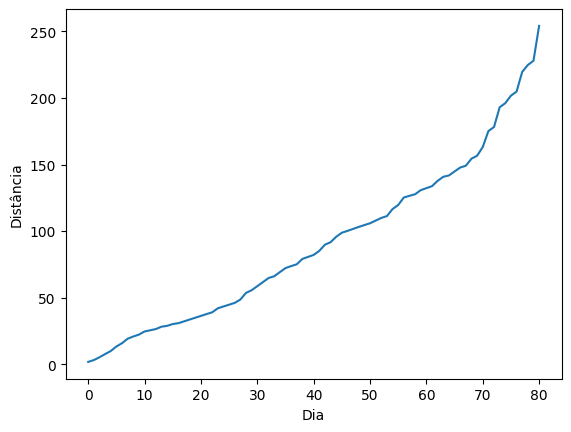

In [11]:
df.Distancia.cumsum().plot()
plt.xlabel("Dia")
plt.ylabel("Distância")

<Axes: >

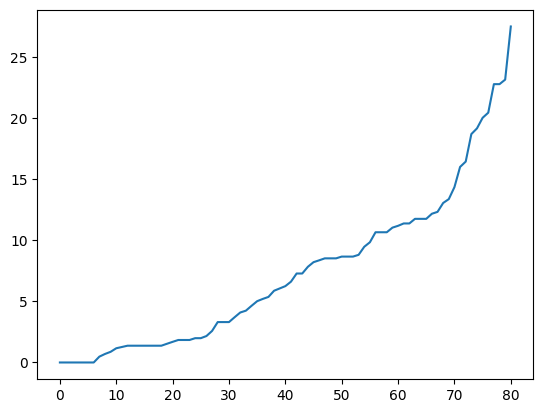

In [12]:
(df.Minutos.fillna(0).cumsum() / 60).plot()

In [13]:
df.Data[0].strftime("%A")

'Sunday'

In [14]:
df['day_of_week'] = df.Data.map(lambda x: x.strftime("%A"))

In [15]:
df

,Data,Distancia,Segundos,Minutos,Min_Por_Km,day_of_week
0,2015-08-02,1.70,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,Friday
...,...,...,...,...,...,...
76,2015-12-24,3.05,1508.0,25.133333,8.240437,Thursday
77,2015-12-25,14.80,8400.0,140.000000,9.459459,Friday
78,2015-12-26,5.20,NaN,NaN,NaN,Saturday
79,2015-12-30,3.15,1330.0,22.166667,7.037037,Wednesday


In [16]:
df.Data.map(lambda x: x.strftime("%A")).head()

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: Data, dtype: object

In [18]:
df['Dia_Semana'] = df.Data.map(lambda x: x.strftime("%A"))

In [19]:
df.head(10)

,Data,Distancia,Segundos,Minutos,Min_Por_Km,day_of_week,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,Sunday,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,Monday,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,Tuesday,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,Thursday,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,Friday,Friday
5,2015-08-08,3.40,NaN,NaN,NaN,Saturday,Saturday
6,2015-08-09,2.50,NaN,NaN,NaN,Sunday,Sunday
7,2015-08-10,3.36,1717.0,28.616667,8.516865,Monday,Monday
8,2015-08-11,1.67,787.0,13.116667,7.854291,Tuesday,Tuesday
9,2015-08-12,1.42,635.0,10.583333,7.453052,Wednesday,Wednesday


<Axes: xlabel='Dia_Semana'>

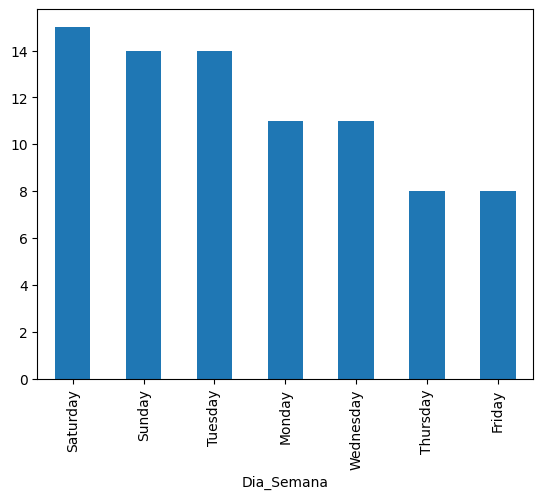

In [20]:
df[df.Distancia > 0].Dia_Semana.value_counts().plot(kind = 'bar')

In [21]:
# Já temos minutos e segundos, podemos deletar a coluna Tempo
del(df['Tempo'])

KeyError: 'Tempo'

In [22]:
df.head()

,Data,Distancia,Segundos,Minutos,Min_Por_Km,day_of_week,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,Sunday,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,Monday,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,Tuesday,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,Thursday,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,Friday,Friday


In [23]:
# Drop pode ser usado para deletar linhas ou colunas, de acordo com o parâmetro axis
df.drop('Segundos', axis = 1)

,Data,Distancia,Minutos,Min_Por_Km,day_of_week,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,Sunday,Sunday
1,2015-08-03,1.40,NaN,NaN,Monday,Monday
2,2015-08-04,2.10,NaN,NaN,Tuesday,Tuesday
3,2015-08-06,2.38,NaN,NaN,Thursday,Thursday
4,2015-08-07,2.30,NaN,NaN,Friday,Friday
...,...,...,...,...,...,...
76,2015-12-24,3.05,25.133333,8.240437,Thursday,Thursday
77,2015-12-25,14.80,140.000000,9.459459,Friday,Friday
78,2015-12-26,5.20,NaN,NaN,Saturday,Saturday
79,2015-12-30,3.15,22.166667,7.037037,Wednesday,Wednesday


In [24]:
tempdf = pd.DataFrame(np.arange(4).reshape(2,2))
tempdf

,0,1
0,0,1
1,2,3


In [25]:
tempdf.drop(1, axis = 0)

,0,1
0,0,1


In [26]:
df.pop('Segundos')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
       ...   
76     1508.0
77     8400.0
78        NaN
79     1330.0
80    15643.0
Name: Segundos, Length: 81, dtype: float64

In [27]:
for dia in df.Dia_Semana.unique():
    print(dia)
    print(df[df.Dia_Semana == dia])
    break

Sunday
         Data  Distancia     Minutos  Min_Por_Km day_of_week Dia_Semana
0  2015-08-02       1.70         NaN         NaN      Sunday     Sunday
6  2015-08-09       2.50         NaN         NaN      Sunday     Sunday
14 2015-08-16       0.65         NaN         NaN      Sunday     Sunday
22 2015-08-23       1.34         NaN         NaN      Sunday     Sunday
42 2015-10-04       4.63   40.000000    8.639309      Sunday     Sunday
43 2015-10-04       1.87         NaN         NaN      Sunday     Sunday
44 2015-10-04       4.08   33.000000    8.088235      Sunday     Sunday
47 2015-10-18       1.50    9.666667    6.444444      Sunday     Sunday
48 2015-10-18       1.50         NaN         NaN      Sunday     Sunday
49 2015-10-18       1.37         NaN         NaN      Sunday     Sunday
51 2015-10-25       2.00         NaN         NaN      Sunday     Sunday
68 2015-12-13       5.30   43.600000    8.226415      Sunday     Sunday
69 2015-12-13       2.21   18.983333    8.589744      Sun

In [28]:
df['Distancia'] = df.Distancia[df.Distancia > 0]

In [33]:
dias = df.drop('day_of_week', axis=1).drop('Data', axis=1).groupby('Dia_Semana')
print(dias)
dias

In [34]:
dias.size()

Dia_Semana
Friday        8
Monday       11
Saturday     15
Sunday       14
Thursday      8
Tuesday      14
Wednesday    11
dtype: int64

In [35]:
dias.count()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,8,5,5
Monday,11,8,8
Saturday,15,8,8
Sunday,14,6,6
Thursday,8,7,7
Tuesday,14,10,10
Wednesday,11,8,8


In [36]:
dias.mean()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,6.315000,84.530000,8.039543
Monday,2.422727,19.762500,7.463840
Saturday,2.786000,24.308333,7.747657
Sunday,3.246429,46.708333,8.184961
Thursday,3.315000,28.021429,7.829348
Tuesday,2.607143,22.243333,7.463291
Wednesday,2.428182,21.770833,7.659706


In [37]:
dias.sum()

,Distancia,Minutos,Min_Por_Km
Dia_Semana,,,
Friday,50.52,422.650000,40.197717
Monday,26.65,158.100000,59.710723
Saturday,41.79,194.466667,61.981259
Sunday,45.45,280.250000,49.109769
Thursday,26.52,196.150000,54.805434
Tuesday,36.50,222.433333,74.632908
Wednesday,26.71,174.166667,61.277645


In [38]:
dias.describe()

Distancia                                                          \
               count      mean       std   min     25%    50%     75%    max   
Dia_Semana                                                                     
Friday           8.0  6.315000  9.300811  0.90  0.9750  1.835  5.9875  26.20   
Monday          11.0  2.422727  1.000241  1.34  1.4500  3.000  3.0500   4.03   
Saturday        15.0  2.786000  1.510718  1.20  1.3700  3.000  3.2500   5.63   
Sunday          14.0  3.246429  3.592504  0.65  1.5000  1.935  3.6850  14.80   
Thursday         8.0  3.315000  3.562291  1.37  1.4675  2.365  2.6375  12.00   
Tuesday         14.0  2.607143  1.688538  0.65  1.4025  1.885  3.0875   6.50   
Wednesday       11.0  2.428182  1.321990  1.37  1.3700  2.000  3.0500   5.63   

           Minutos             ...                         Min_Por_Km  \
             count       mean  ...         75%         max      count   
Dia_Semana                     ...                                      
Friday         5.0  84.530000  ...  140.000000  260.716667        5.0   
Monday         8.0  19.762500  ...   24.116667   30.366667        8.0   
Saturday       8.0  24.308333  ...   30.550000   49.083333        8.0   
Sunday         6.0  46.708333  ...   42.700000  135.000000        6.0   
Thursday       7.0  28.021429  ...   25.066667   99.000000        7.0   
Tuesday       10.0  22.243333  ...   26.795833   58.716667       10.0   
Wednesday      8.0  21.770833  ...   23.350000   51.833333        8.0   

                                                                        \
                mean       std       min       25%       50%       75%   
Dia_Semana                                                               
Friday      8.039543  1.531027  6.861314  6.962963  6.962963  9.459459   
Monday      7.463840  0.578829  6.362530  7.408470  7.474317  7.533788   
Saturday    7.747657  0.844590  6.630170  7.025547  7.803279  8.523306   
Sunday      8.184961  0.926076  6.444444  8.122780  8.408079  8.626918   
Thursday    7.829348  1.142713  6.532847  7.185401  7.411348  8.245219   
Tuesday     7.463291  1.037698  6.000000  6.677835  7.520672  7.815719   
Wednesday   7.659706  0.830158  6.630170  7.218276  7.464231  7.881281   

                       
                  max  
Dia_Semana             
Friday       9.951018  
Monday       8.516865  
Saturday     8.718176  
Sunday       9.121622  
Thursday    10.000000  
Tuesday      9.033333  
Wednesday    9.206631  

[7 rows x 24 columns]

In [39]:
df.groupby('Dia_Semana').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df.groupby('Dia_Semana').std()

In [ ]:
for name, group in dias:
    print(name)
    print(group)

In [ ]:
dias.get_group('Friday')

In [ ]:
dias.agg(lambda x: len(x))['Distancia']

In [ ]:
df['Count'] = 1
df.head(10)

In [ ]:
df.groupby('Dia_Semana').sum()